In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn .metrics import mean_squared_error,r2_score, accuracy_score

In [3]:
mall=pd.read_csv('Mall_Customers.csv')
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
mall.shape

(200, 5)

In [5]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
m1=mall.copy()

from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()
m1['Genre']=lb.fit_transform(mall['Genre'])
m1.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


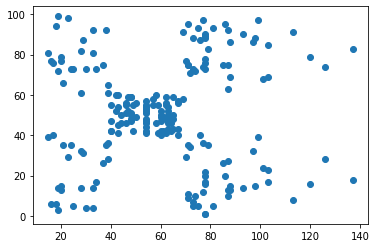

In [7]:
plt.scatter(x='Annual Income (k$)',y='Spending Score (1-100)',data=m1)

# Linear Regression

All algorithms which we have applied above give R2 Sore but it will not give cluster of data
For Grouping (Segmentation) of data, we can use K-Mean Clustering. 

K-Means also works on euclier distance

Elbow Method= This method will find K



In [8]:
X=m1.iloc[:,[3,4]].values


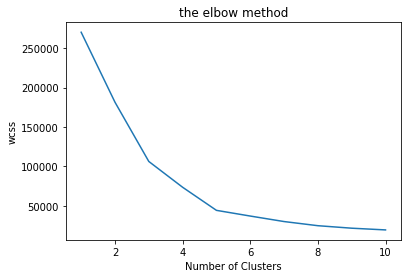

In [9]:
from sklearn.cluster import KMeans

wcss=[] # within cluster sum of squares
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [10]:
kmeans=KMeans(n_clusters =5, init='k-means++', random_state=42)
y_kmeans=kmeans.fit_predict(X)
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

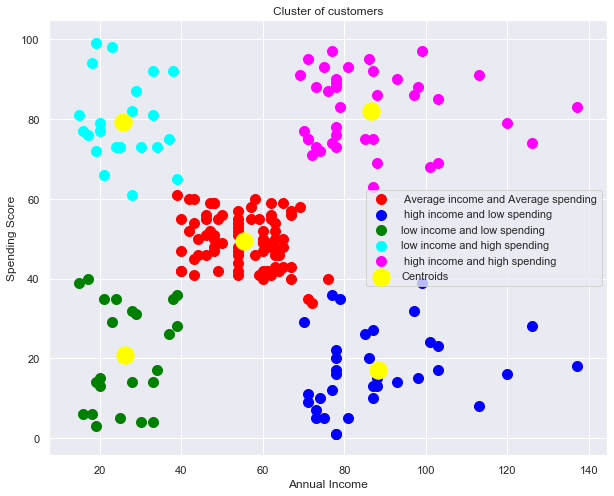

In [11]:

sns.set()
plt.figure(figsize=(10,8))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100, c='red',label=' Average income and Average spending')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100, c='blue',label=' high income and low spending')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100, c='green',label='low income and low spending')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100, c='cyan',label='low income and high spending')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100, c='magenta',label=' high income and high spending')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Cluster of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

Cluster 5: high income and high spending so target
Cluster 4: low income and high spending so careles
Cluster 3: low income and low spending so standard
Cluster 2: high income and low spending so careful
Cluster 1: Average income and Average spending so sensible

Hence we can target 2 group : Cluster 5 and Cluster 4 and we can give this prediction to marketing department for there further process


**Use of Clustering:**

Customer Segmentation
Social Network Analysis
City Planning

Hierarchical Clustering:

Agglomerative: grouping from Bottom to Up , konown us Bottom Approch

In this Clustering we'll use dendogram to find cluster values